In [22]:
import pandas as pd
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Provided in tennis_stats.csv is data from the men’s professional tennis league, which is called the ATP [(Association of Tennis Professionals)](https://www.atptour.com/en/). Data from the top 1500 ranked players in the ATP over the span of 2009 to 2017 are provided in file. The statistics recorded for each player in each year include service game (offensive) statistics, return game (defensive) statistics and outcomes.

In [3]:
# Load dataset
tennis = pd.read_csv("tennis_stats.csv")
tennis.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [4]:
# examine dtypes and shape of dataframe
tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [14]:
# examine NA's
tennis.isna().sum()

Player                        0
Year                          0
FirstServe                    0
FirstServePointsWon           0
FirstServeReturnPointsWon     0
SecondServePointsWon          0
SecondServeReturnPointsWon    0
Aces                          0
BreakPointsConverted          0
BreakPointsFaced              0
BreakPointsOpportunities      0
BreakPointsSaved              0
DoubleFaults                  0
ReturnGamesPlayed             0
ReturnGamesWon                0
ReturnPointsWon               0
ServiceGamesPlayed            0
ServiceGamesWon               0
TotalPointsWon                0
TotalServicePointsWon         0
Wins                          0
Losses                        0
Winnings                      0
Ranking                       0
dtype: int64

In [20]:
# Drop Player and Year Columns
tennis_clean = tennis.drop(["Player", "Year"], axis=1)
tennis_clean.head()

,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,BreakPointsSaved,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,0.88,0.50,0.38,0.50,0.39,0,0.14,7,7,0.43,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,0.84,0.62,0.26,0.33,0.07,7,0.00,7,0,0.57,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,0.83,0.60,0.28,0.53,0.44,2,0.38,10,8,0.40,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,0.83,0.64,0.34,0.59,0.33,2,0.33,5,6,0.40,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,0.81,0.54,0.00,0.33,0.33,1,0.00,2,0,0.50,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


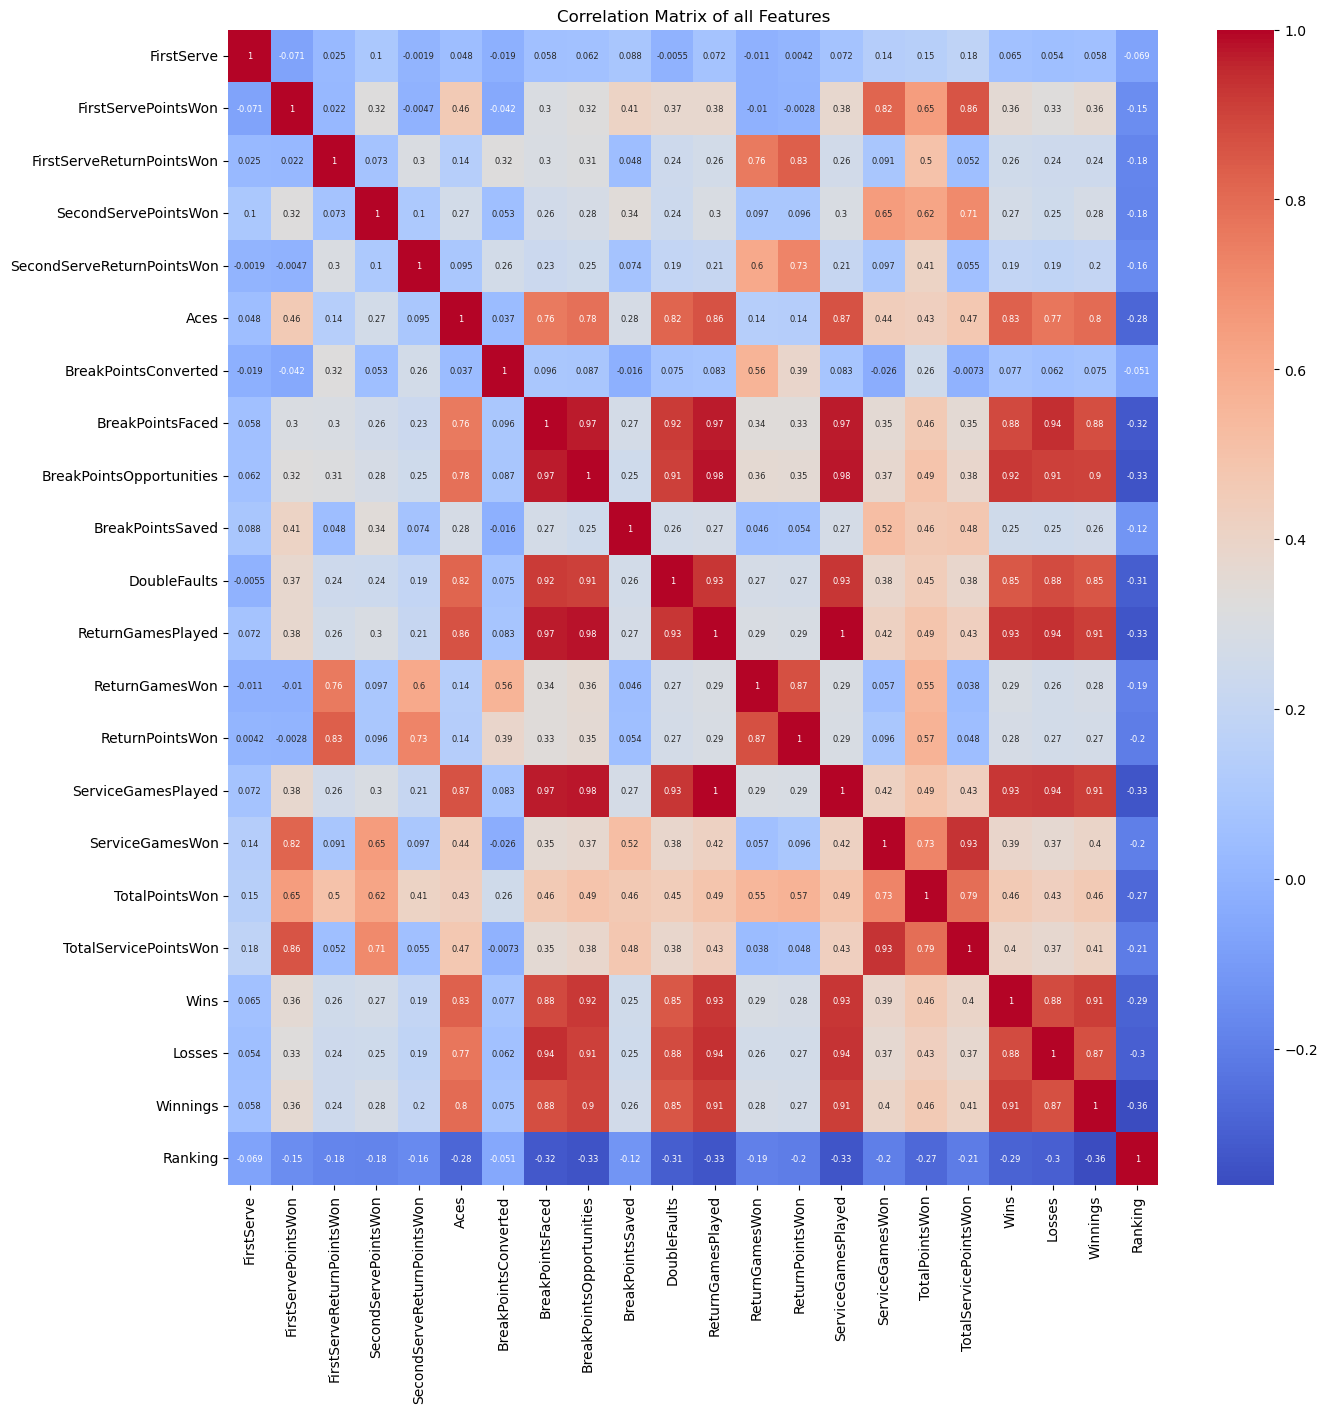

In [35]:
# Create a correlation matrix
corr_matrix = tennis_clean.corr()

# Plot the correlation matrix as heatmap

fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size":6})
plt.title("Correlation Matrix of all Features")
plt.show()
plt.close()


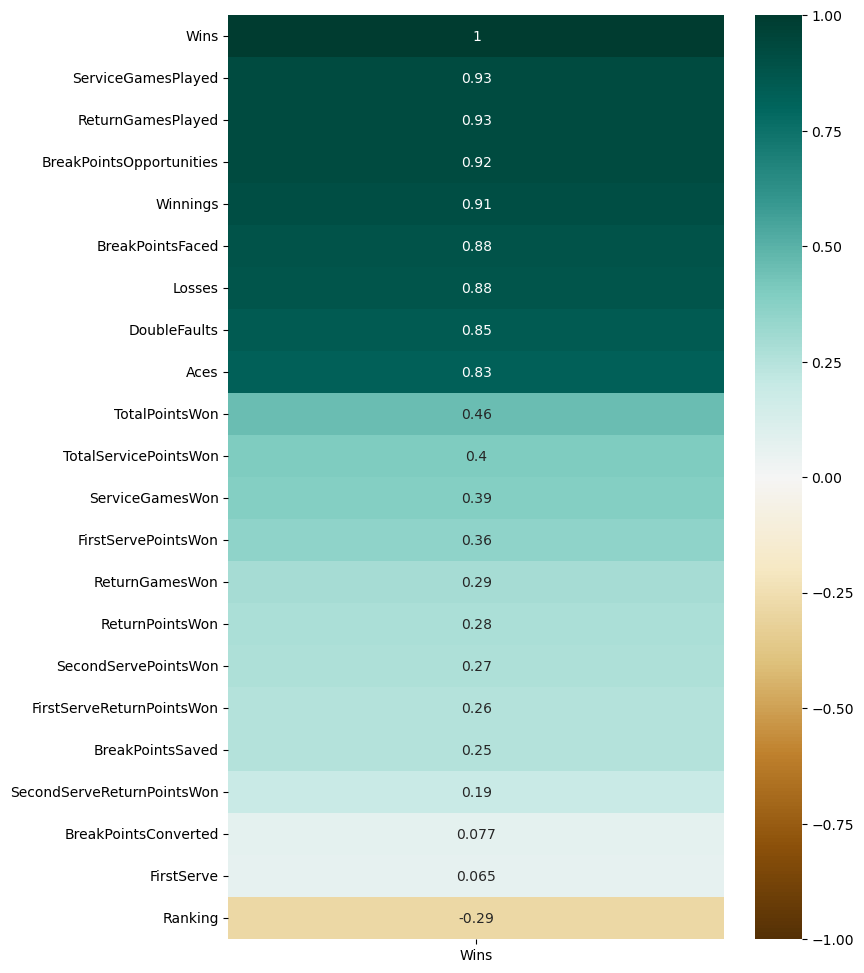

In [40]:


# Create "Heatmap on Target"-Function

def heatmap_on_target(data, target):
    f, ax = plt.subplots(figsize=(8,12))
    ax = sns.heatmap(data[[target]].sort_values(by=target, ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
    plt.show()
    plt.close()

heatmap_on_target(corr_matrix, "Wins")

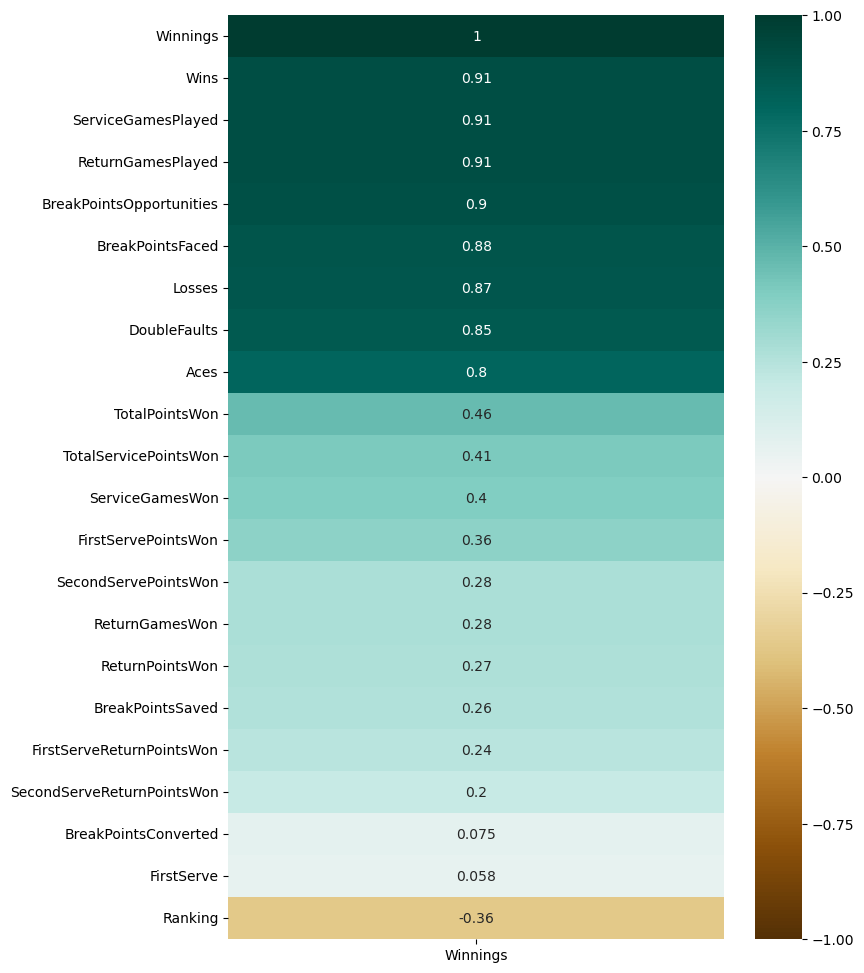

In [41]:
heatmap_on_target(corr_matrix, "Winnings")

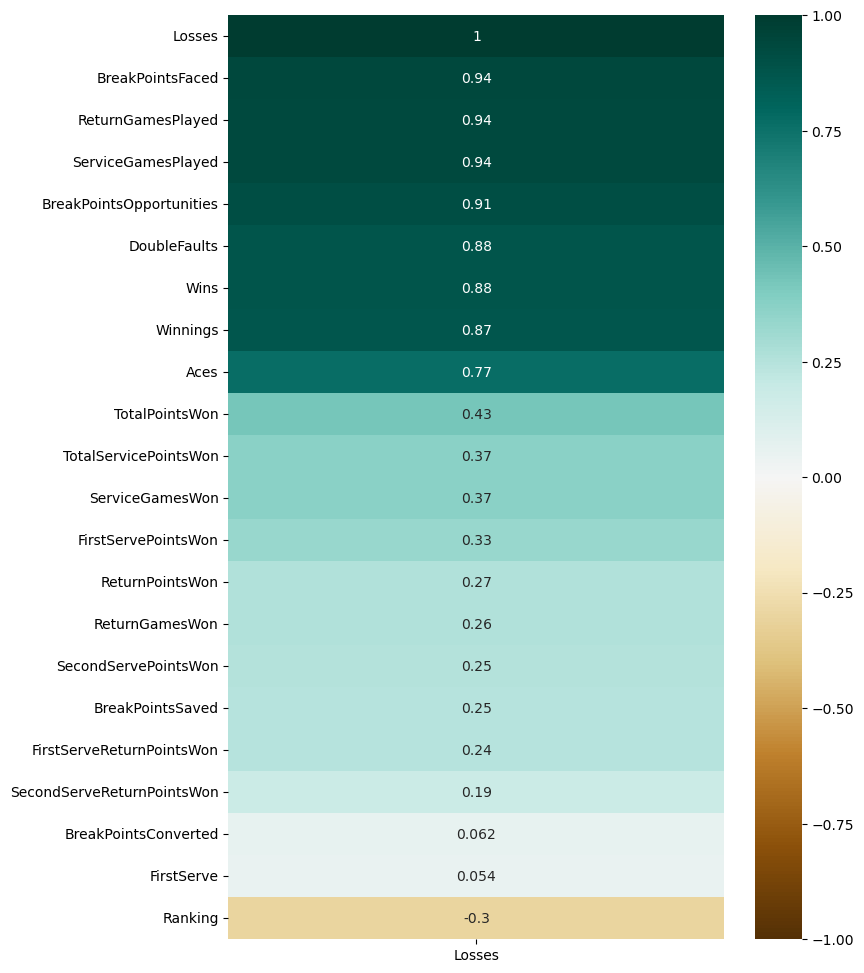

In [42]:
heatmap_on_target(corr_matrix, "Losses")

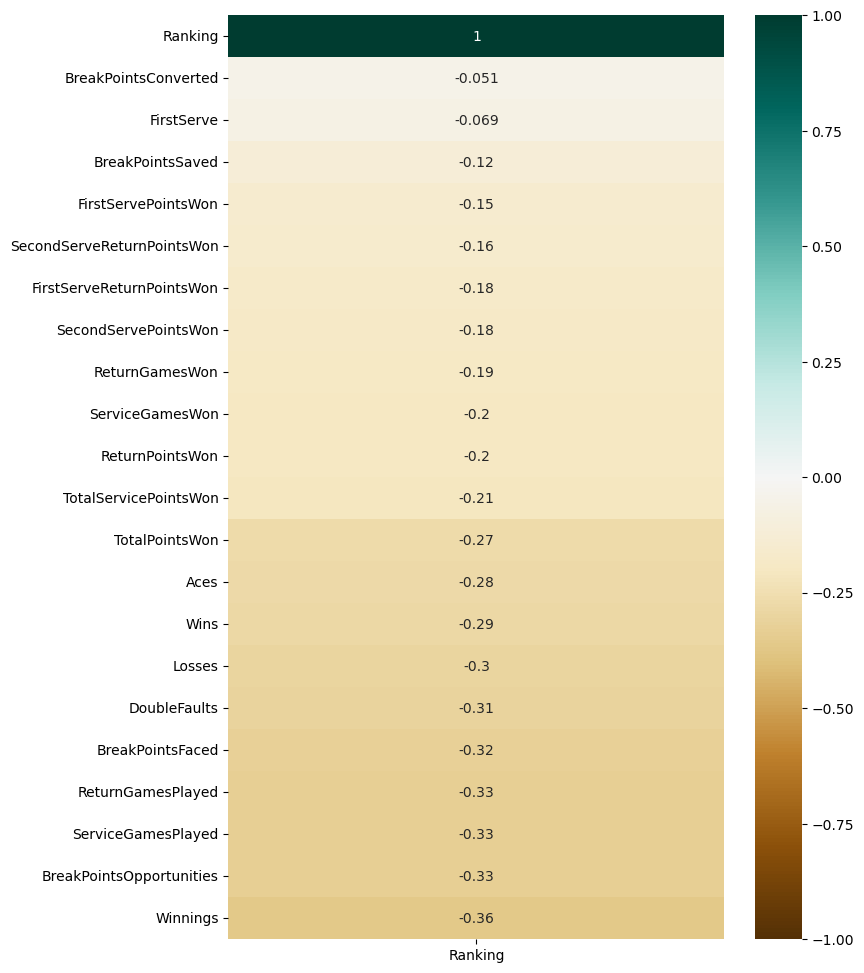

In [43]:
heatmap_on_target(corr_matrix, "Ranking")